<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from IIA import VoteResult3D
import pandas as pd
import numpy as np




In [2]:

def simulate(numTest,n,m,dimension):
    dict = {"n":[], "m":[], "Dimension":[], "Plurality IIA Check":[],
    "Copeland IIA Check":[], "STV IIA Check":[],
    "Borda IIA Check":[],"STAR IIA Check":[], "Plurality Veto IIA Check": []}
    for i in range(numTest):
        test = VoteResult3D(n, m, dimension)
        dict["n"].append(n)
        dict["m"].append(m)
        dict["Dimension"].append(test.dimension)
        

        #winners 
        dict["Plurality IIA Check"].append(test.iiaCheck("plurality"))
        dict["Copeland IIA Check"].append(test.iiaCheck("copeland"))
        dict["STV IIA Check"].append(test.iiaCheck("STV"))
        dict["Borda IIA Check"].append(test.iiaCheck("borda"))
        dict["STAR IIA Check"].append(test.iiaCheck("STAR"))
        dict["Plurality Veto IIA Check"].append(test.iiaCheck("pluralityVeto"))

        

        
    df = pd.DataFrame(dict)
    df.to_csv('IIACheck.csv', mode="a", header=None)

# Now you have a DataFrame df with the results of your simulations


In [3]:
dimension = ["1D", "2D", "3D"]
narray = [100]
marray = [5, 10, 20, 50]

# for d in dimension:
#     for n in narray:
#         for m in marray:
#             simulate(1000, n, m, d)

simulate(1000,100,50,"3D")

In [5]:
main = pd.read_csv("IIACheck.csv")

main

,index,n,m,Dimension,Plurality IIA Check,Copeland IIA Check,STV IIA Check,Borda IIA Check,STAR IIA Check,Plurality Veto IIA Check
0,0,100,5,1D,True,True,False,True,True,True
1,1,100,5,1D,False,True,True,False,False,True
2,2,100,5,1D,False,True,False,False,True,False
3,3,100,5,1D,False,True,True,True,False,True
4,4,100,5,1D,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
11995,995,100,50,3D,False,False,False,True,False,False
11996,996,100,50,3D,False,True,False,True,True,False
11997,997,100,50,3D,False,True,False,True,True,False
11998,998,100,50,3D,True,True,False,True,False,False


In [6]:
# Assuming you have a DataFrame 'main' and a target value 'True'
target_value = True

# Group by 'Distribution' and calculate the percentage of each method choosing the OPT
IIACheck = main.groupby("Dimension").agg(
    Plurality_percentage=('Plurality IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto IIA Check', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

IIACheck

,Dimension,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,1D,43.675,98.925,37.525,28.375,65.25,76.125
1,2D,41.550,96.275,39.700,59.175,81.30,62.825
2,3D,45.400,96.400,49.375,74.500,85.95,66.000


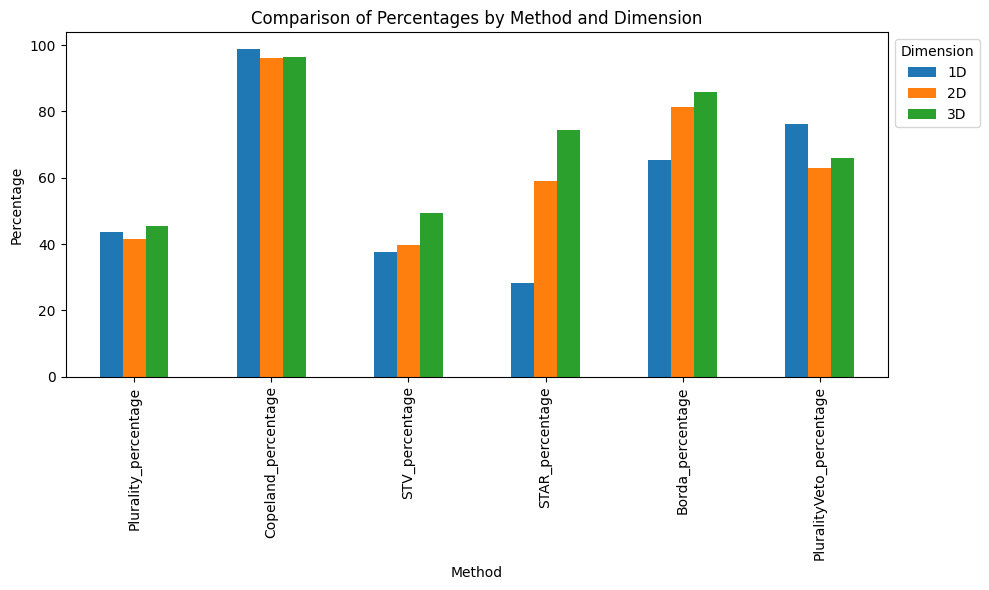

In [7]:
import matplotlib.pyplot as plt
df = IIACheck
# List of columns you want to compare
columns_to_compare = ["Plurality_percentage", "Copeland_percentage", "STV_percentage", "STAR_percentage", "Borda_percentage", "PluralityVeto_percentage"]

# Transpose the DataFrame
df = df.set_index("Dimension")[columns_to_compare].T

# Plotting
ax = df.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Method")
plt.ylabel("Percentage")
plt.title("Comparison of Percentages by Method and Dimension")
plt.legend(title="Dimension", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()